In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Forward Euler Method
def eulerMethod_one_step(yi,ti,f,h):
    return yi + h*f(ti,yi)

def eulerMethod(t0,T,N,y0,f):
    t = np.linspace(t0,T,N + 1)
    h = (T - t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N + 1)
    else:
        y = np.zeros((N + 1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = eulerMethod_one_step(y[i],t[i],f,h)
    return t, y

# Runge-Kutta of Second order
def RK2_one_step(yi,ti,f,h):
    k1 = f(ti,yi)
    return yi + h*f(ti + h/2.0,yi + h/2.0*k1)

def RK2(t0,T,N,y0,f):
    t = np.linspace(t0,T,N + 1)
    h = (T-t0)/N
    if isinstance(y0,(int,float)):
        y = np.zeros(N + 1)
    else:
        y = np.zeros((N + 1,len(y0)))
    y[0] = y0
    for i in np.arange(N):
        y[i+1] = RK2_one_step(y[i],t[i],f,h)
    return t, y

La segunda ley de Newton establece que la aceleración $a$ de un satélite está relacionada a la fuerza $F$ aplicada al mismo como $F = m\,a$, donde $m$ es su masa. La ley de la gravitación expresa la fuerza sobre un cuerpo de masa $m_1$ debido a la masa de un cuerpo de masa $m_2$ como:

$$
\begin{equation}
F = \dfrac{g\,m_1\,m_2}{r^2}
\end{equation}
$$

donde $r$ es la distancia entre los cuerpos.

En el caso de un satélite orbitando un planeta, la masa de este se puede despreciar, quedando un **problema de un cuerpo**. Esta simplificación permite despreciar la fuerza del satélite sobre el planeta, luego, el planeta es considerado como fijo.

Consideremos que el planeta está posicionado en el origen y que la posición del satélite viene dada por $(x,y)$. La distancia entre las masas entonces es $r = \sqrt{x^2 + y^2}$ y la fuerza sobre el satélite es central, es decir, en la dirección de la masa mayor. El vector dirección (unitario) viene dado por:

$$
\begin{equation}
\left(-\dfrac{x}{\sqrt{x^2 + y^2}},-\dfrac{y}{\sqrt{x^2 + y^2}}\right)
\end{equation}
$$

Luego, la fuerza sobre el satélite es,

$$
\begin{equation}
(F_x,F_y) = \left(\dfrac{g\,m_1\,m_2}{x^2 + y^2}\,\dfrac{-x}{\sqrt{x^2 + y^2}},\dfrac{g\,m_1\,m_2}{x^2 + y^2}\,\dfrac{-y}{\sqrt{x^2 + y^2}}\right)
\end{equation}
$$

Considerando la ley de movimiento de Newton y la ecuación anterior, se tiene que:

$$
\begin{align*}
m_1\,x'' &= -\dfrac{g\,m_1\,m_2\,x}{(x^2 + y^2)^{3/2}}\\
m_1\,y'' &= -\dfrac{g\,m_1\,m_2\,y}{(x^2 + y^2)^{3/2}}
\end{align*}
$$

Tomando $v_x = x'$ y $v_y = y'$, se tiene el siguiente sistema de ecuaciones
diferenciales:

$$
\begin{align*}
x'   &= v_x \\
v_x' &= -\dfrac{g\,m_2\,x}{(x^2 + y^2)^{3/2}}\\
y'   &= v_y \\
v_y' &= -\dfrac{g\,m_2\,y}{(x^2 + y^2)^{3/2}}
\end{align*}
$$

Definimos entonces un vector $\mathbf{w}(t)$:

$$
\mathbf{w}(t) =
\begin{bmatrix}
x(t) \\ x'(t) \\ y(t) \\ y'(t) 
\end{bmatrix}
=
\begin{bmatrix}
w_1(t) \\ w_2(t) \\ w_3(t) \\ w_4(t) 
\end{bmatrix}
\qquad
\mathbf{w}' =
\begin{bmatrix}
x'(t) \\ x''(t) \\ y'(t) \\ y''(t) 
\end{bmatrix}
=
\begin{bmatrix}
x'(t) \\ v_x'(t) \\ y'(t) \\ v_y'(t) 
\end{bmatrix}
=
\begin{bmatrix}
w_2(t) \\ -\dfrac{g\,m_2\,w_1(t)}{(w_1(t)^2 + w_3(t)^2)^{3/2}} \\ w_4(t) \\ -\dfrac{g\,m_2\,w_3(t)}{(w_1(t)^2 + w_3(t)^2)^{3/2}} 
\end{bmatrix}
= \mathbf{F}(t,\mathbf{w})
$$

Calcularemos las soluciones con Forward-Euler y RK2

In [20]:
m2 = 3.
G = 1.
w0 = np.array([0.,1.,2.,0.])

def F(t,w):
    r = np.power(w[0]**2 + w[2]**2,3./2.)
    w_vec = np.zeros(4)
    w_vec[0] = w[1]
    w_vec[1] = -G*m2*w[0]/r
    w_vec[2] = w[3]
    w_vec[3] = -G*m2*w[2]/r
    return w_vec

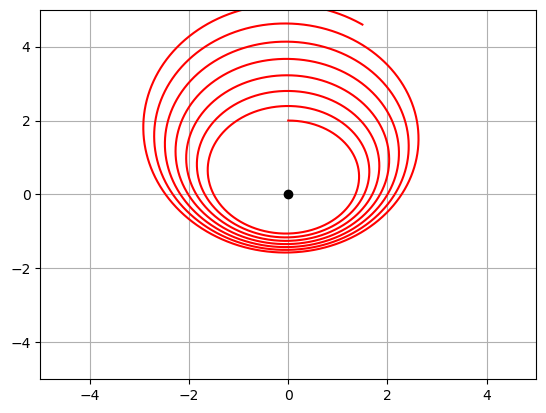

In [21]:
t0,T = 0.,100.
N = 10000
t,w = eulerMethod(t0,T,N,w0,F)

plt.plot(0.,0.,'ko')
plt.plot(w[:,0],w[:,2],'-r')
plt.axis([-5.,5.,-5.,5.])
plt.grid()
plt.show()

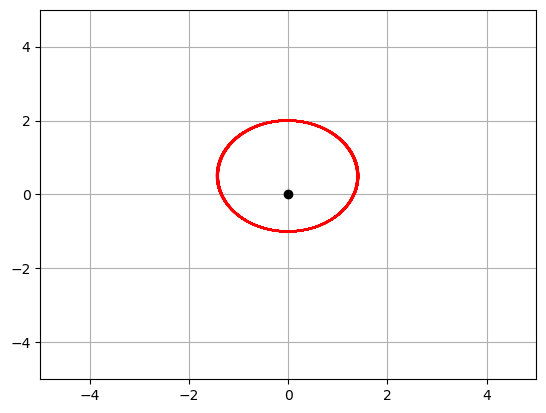

In [23]:
t0,T = 0.,100.
N = 5000
t,w = RK2(t0,T,N,w0,F)

plt.plot(0.,0.,'ko')
plt.plot(w[:,0],w[:,2],'-r')
plt.axis([-5.,5.,-5.,5.])
plt.grid()
plt.show()